In [ ]:
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
 from sklearn.preprocessing import StandardScaler
 import seaborn as sns
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.utils import to_categorical

In [ ]:
 # Load the dataset
 df = pd.read_csv('/content/USvideos.csv')

 # Create the 'viral' column based on views threshold
 df['viral'] = df['views'].apply(lambda x: 1 if x > 10000 else 0)

 # Feature Engineering
 df['likes_dislikes_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Avoid division by zero
 df['views_likes_ratio'] = df['views'] / (df['likes'] + 1)

 # Features and target
 features = ['likes', 'dislikes', 'comment_count', 'likes_dislikes_ratio', 'views_likes_ratio']
 target = 'viral'

 # Fill missing values
 df['comment_count'].fillna(0, inplace=True)

 # Data Splitting
 X = df[features]
 y = df[target]

 # Scale features
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)

 # Split the data into training and testing sets (80% training, 20% testing)
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-11-02fe34c7ff6f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment_count'].fillna(0, inplace=True)


In [ ]:
 # Logistic Regression Model
 from sklearn.linear_model import LogisticRegression

In [ ]:
 # Train Logistic Regression Model
 log_model = LogisticRegression()
 log_model.fit(X_train, y_train)

 # Predictions from Logistic Regression
 y_pred_log = log_model.predict(X_test)

 # Metrics for Logistic Regression
 accuracy_log = accuracy_score(y_test, y_pred_log)
 precision_log = precision_score(y_test, y_pred_log)
 recall_log = recall_score(y_test, y_pred_log)
 f1_log = f1_score(y_test, y_pred_log)

 # Print Logistic Regression metrics
 print(f"Logistic Regression - Accuracy: {accuracy_log:.4f}, Precision: {precision_log:.4f}, Recall: {recall_log:.4f}, F1-Score: {f1_log:.4f}")


Logistic Regression - Accuracy: 0.9773, Precision: 0.9773, Recall: 1.0000, F1-Score: 0.9885


In [ ]:
 # Neural Network Model
 nn_model = Sequential()
 nn_model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
 nn_model.add(Dense(5, activation='relu'))  # Hidden layer
 nn_model.add(Dense(1, activation='sigmoid'))  # Output layer

# # Compile the model
 nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Neural Network
 nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

 # Predictions from Neural Network
 y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# # Metrics for Neural Network
 accuracy_nn = accuracy_score(y_test, y_pred_nn)
 precision_nn = precision_score(y_test, y_pred_nn)
 recall_nn = recall_score(y_test, y_pred_nn)
 f1_nn = f1_score(y_test, y_pred_nn)

 # Print Neural Network metrics
 print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1-Score: {f1_nn:.4f}")



256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network - Accuracy: 0.9808, Precision: 0.9814, Recall: 0.9994, F1-Score: 0.9903


In [22]:
# Add Neural Network accuracy as a new column to the dataset
df['nn_accuracy'] = accuracy_nn

# Save the updated dataset to a new CSV
df.to_csv('/content/USvideos_with_nn_accuracy.csv', index=False)

print("Neural Network accuracy has been added to the dataset and saved as 'USvideos_with_nn_accuracy.csv'.")


Neural Network accuracy has been added to the dataset and saved as 'USvideos_with_nn_accuracy.csv'.


In [29]:
# Get predicted probabilities (virality scores) for all rows in the dataset
X_scaled_full = scaler.transform(df[features])  # Scale all features
df['viral_score'] = nn_model.predict(X_scaled_full).ravel()  # Flatten the probabilities

# Save the updated dataset to a new CSV without adding the 'predicted_viral' column
df.to_csv('/content/USvideos_with_viral_scores.csv', index=False)

print("Added 'viral_score' column to the dataset and saved as 'USvideos_with_viral_scores.csv'.")





1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Added 'viral_score' column to the dataset and saved as 'USvideos_with_viral_scores.csv'.


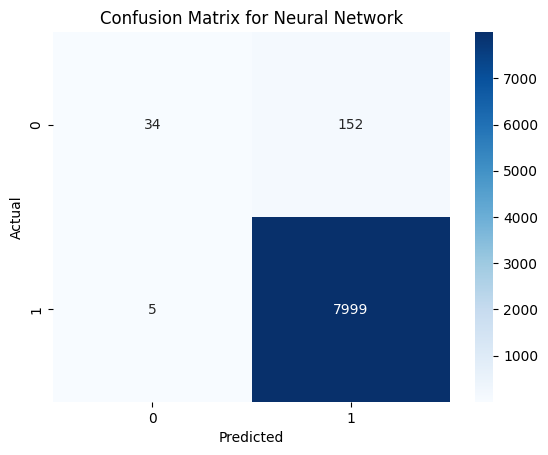

In [19]:
 # Confusion Matrix for Neural Network
 cm_nn = confusion_matrix(y_test, y_pred_nn)
 sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
 plt.title("Confusion Matrix for Neural Network")
 plt.ylabel('Actual')
 plt.xlabel('Predicted')
 plt.show()


256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


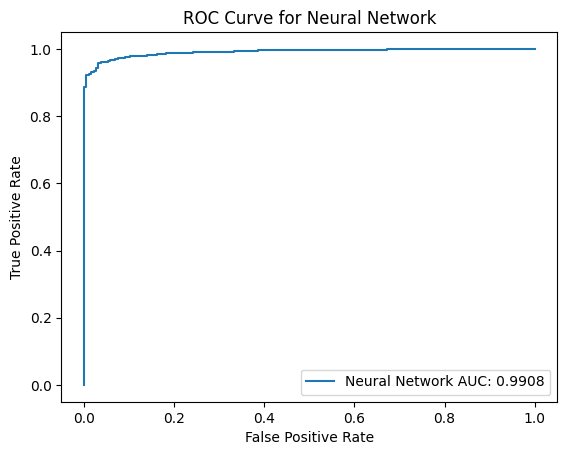

In [20]:
 # ROC Curve for Neural Network
 y_prob_nn = nn_model.predict(X_test).ravel()
 fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
 auc_nn = roc_auc_score(y_test, y_prob_nn)
 plt.plot(fpr_nn, tpr_nn, label=f"Neural Network AUC: {auc_nn:.4f}")
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve for Neural Network')
 plt.legend(loc="lower right")
 plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/USvideos.csv')

# Create the 'viral' column based on views threshold
df['viral'] = df['views'].apply(lambda x: 1 if x > 10000 else 0)

# Feature Engineering
df['likes_dislikes_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Avoid division by zero
df['views_likes_ratio'] = df['views'] / (df['likes'] + 1)

# Features and target
features = ['likes', 'dislikes', 'comment_count', 'likes_dislikes_ratio', 'views_likes_ratio']
target = 'viral'

# Fill missing values
df['comment_count'].fillna(0, inplace=True)

# Data Splitting
X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions from Logistic Regression
y_pred_log = log_model.predict(X_test)

# Metrics for Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Print Logistic Regression metrics
print(f"Logistic Regression - Accuracy: {accuracy_log:.4f}, Precision: {precision_log:.4f}, Recall: {recall_log:.4f}, F1-Score: {f1_log:.4f}")

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
nn_model.add(Dense(5, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Predictions from Neural Network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Metrics for Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Print Neural Network metrics
print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1-Score: {f1_nn:.4f}")

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Neural Network")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve for Neural Network
y_prob_nn = nn_model.predict(X_test).ravel()
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
auc_nn = roc_auc_score(y_test, y_prob_nn)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network AUC: {auc_nn:.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Summary of results
print("\n--- Summary of Virality Prediction ---")
print(f"Logistic Regression - Accuracy: {accuracy_log:.4f}, Precision: {precision_log:.4f}, Recall: {recall_log:.4f}, F1-Score: {f1_log:.4f}")
print(f"Neural Network - Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1-Score: {f1_nn:.4f}")


<ipython-input-21-5b2778bde02b>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment_count'].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Logistic Regression - Accuracy: 0.9773, Precision: 0.9773, Recall: 1.0000, F1-Score: 0.9885


KeyboardInterrupt: 